# Analyse épurée – Notebook
Ce notebook lit `notebooks/data_urbaines_fictives.csv` et génère 5 images dans `assets/`:
- 1_types, 2_plateformes, 3_scatter, 4_sentiments, 5_localisations.

> Ouvrez **Kernel → Restart & Run All** pour un run propre.


In [1]:
# --- Setup minimal et chemins ---
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# On EST dans notebooks/
NOTEBOOKS_DIR = Path.cwd()
ROOT = NOTEBOOKS_DIR.parent                 # racine du projet
CSV_FILE = NOTEBOOKS_DIR / "data_urbaines_fictives.csv"  # CSV RESTE dans notebooks
ASSETS_DIR = ROOT / "assets"                # images pour le README (sur GitHub)
ASSETS_DIR.mkdir(exist_ok=True)

print("CSV        :", CSV_FILE)
print("Images --> :", ASSETS_DIR)

if not CSV_FILE.exists():
    raise FileNotFoundError("❌ CSV introuvable : placez 'data_urbaines_fictives.csv' dans le dossier notebooks/")

df = pd.read_csv(CSV_FILE, encoding="utf-8")
display(df.head())
print("Taille :", df.shape)


CSV        : c:\Users\natha\Documents\mon-portfolio\culture_analyse_epure\notebooks\data_urbaines_fictives.csv
Images --> : c:\Users\natha\Documents\mon-portfolio\culture_analyse_epure\assets


,ID_Post,Date_Publication,Plateforme,Type_Pratique,Mots_Cles,Sentiment,Nb_Likes,Nb_Commentaires,Nb_Partages,Localisation
0,1,2024-01-15,Instagram,Street Art,"Fresque, Murale, Art Urbain, Graffiti",Positif,1500,80,120,Paris
1,2,2024-01-16,TikTok,Danse Urbaine,"Breakdance, Battle, Crew, HipHop",Très Positif,3200,150,280,Marseille
2,3,2024-01-17,Forum_Specialise,Musique Alternative,"Rap Indé, Scène Locale, Underground",Neutre,450,30,15,Lyon
3,4,2024-01-18,Instagram,Danse Urbaine,"Breakdance, Freestyle, Crew, HipHop",Neutre,155,5,6,Cameroun
4,5,2024-01-19,YouTube,Musique urbaine,"Rap, Afrotrap, Drill, Beat",Très Positif,2078,108,78,Paris


Taille : (120, 10)


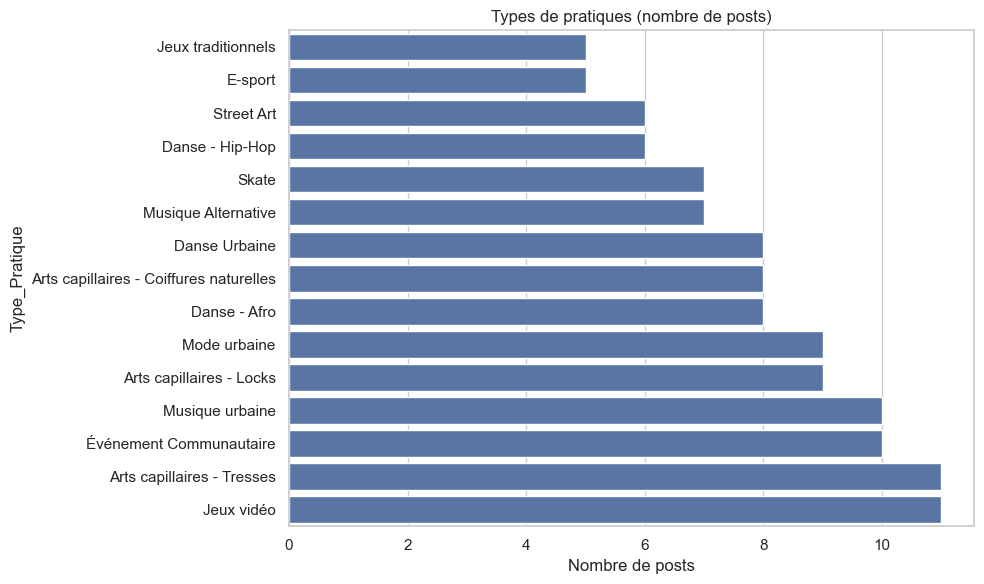

In [2]:
# 1) Types de pratiques (nb de posts)
counts = df['Type_Pratique'].value_counts().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=counts.values, y=counts.index)
plt.title("Types de pratiques (nombre de posts)")
plt.xlabel("Nombre de posts"); plt.ylabel("Type_Pratique")
plt.tight_layout()
plt.savefig(ASSETS_DIR / "1_types.png", dpi=150, bbox_inches="tight")
plt.show()


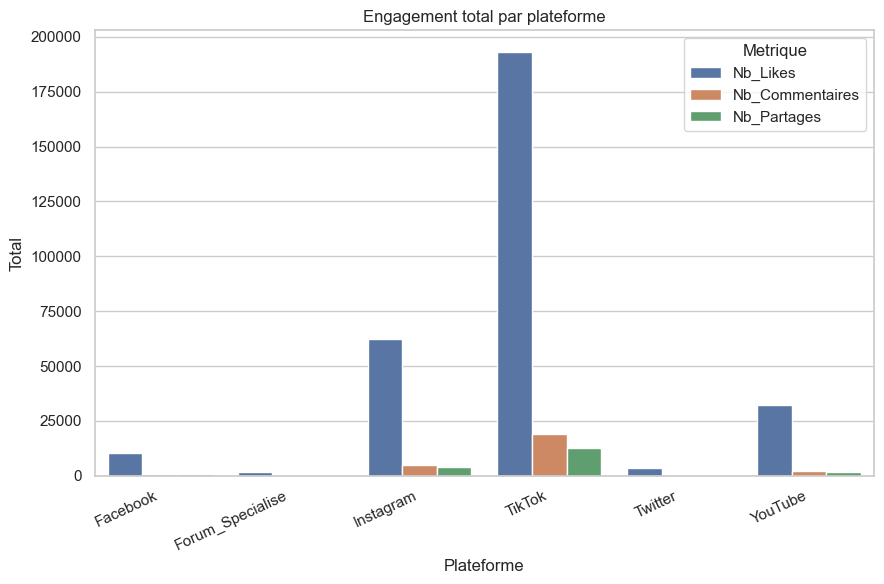

In [3]:
# 2) Engagement total par plateforme (likes, commentaires, partages)
agg = df.groupby("Plateforme")[['Nb_Likes','Nb_Commentaires','Nb_Partages']].sum().reset_index()
melted = agg.melt(id_vars="Plateforme", var_name="Metrique", value_name="Total")
plt.figure(figsize=(9,6))
sns.barplot(data=melted, x="Plateforme", y="Total", hue="Metrique")
plt.title("Engagement total par plateforme")
plt.xlabel("Plateforme"); plt.ylabel("Total")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.savefig(ASSETS_DIR / "2_plateformes.png", dpi=150, bbox_inches="tight")
plt.show()


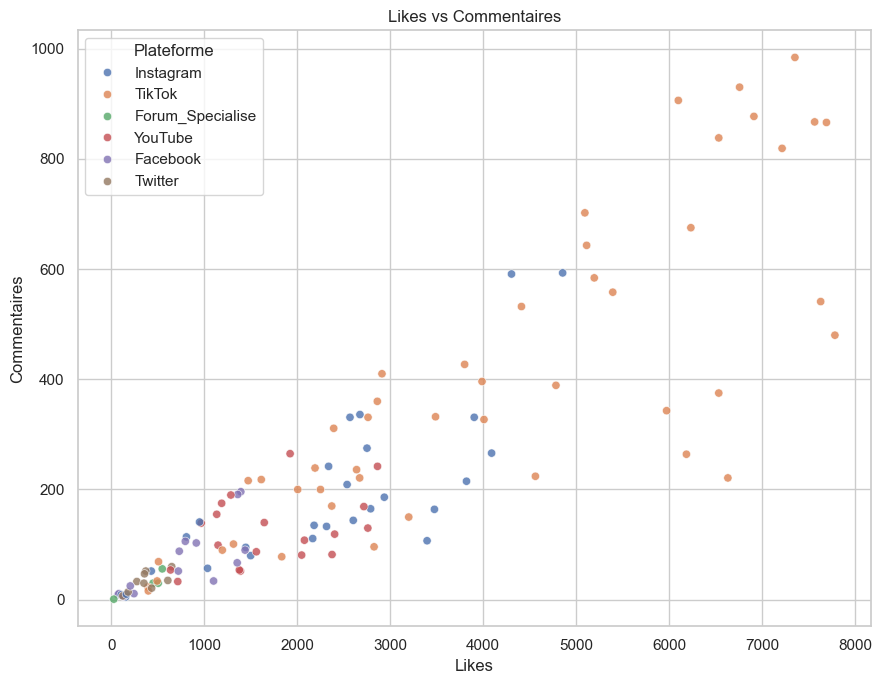

In [4]:
# 3) Nuage de points Likes vs Commentaires (couleur = plateforme)
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x="Nb_Likes", y="Nb_Commentaires", hue="Plateforme", alpha=0.8)
plt.title("Likes vs Commentaires")
plt.xlabel("Likes"); plt.ylabel("Commentaires")
plt.tight_layout()
plt.savefig(ASSETS_DIR / "3_scatter.png", dpi=150, bbox_inches="tight")
plt.show()


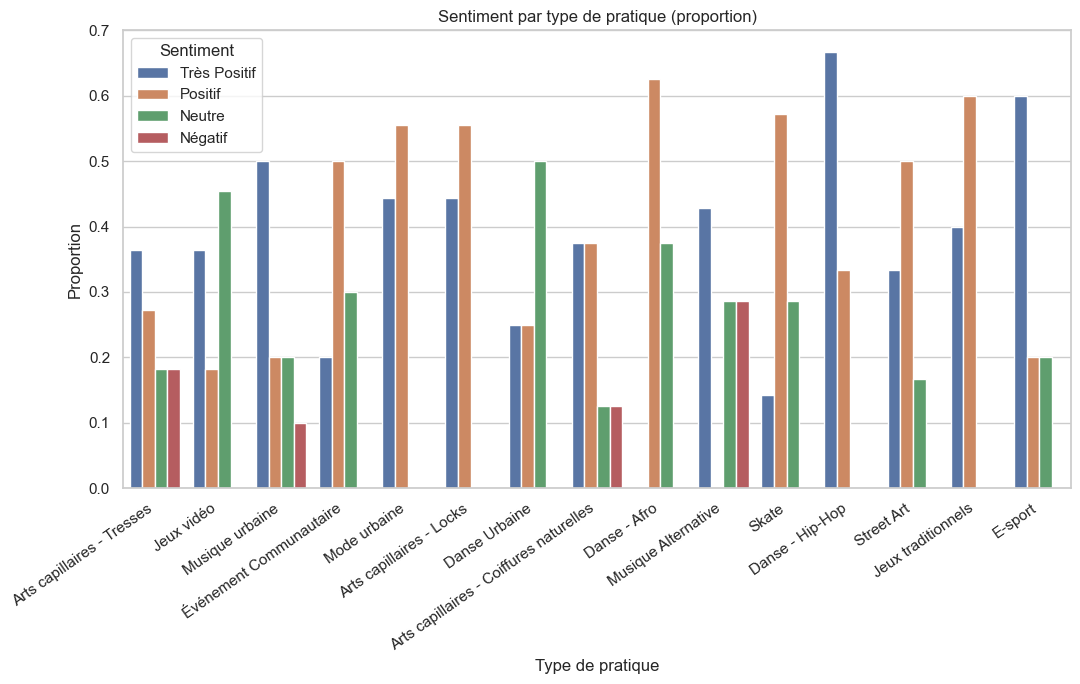

In [5]:
# 4) Sentiment par type (proportion) — version robuste
counts_sent = (
    df.groupby(['Type_Pratique', 'Sentiment'], as_index=False)
      .size()
      .rename(columns={'size': 'Count'})
)
counts_sent['Proportion'] = counts_sent['Count'] / counts_sent.groupby('Type_Pratique')['Count'].transform('sum')
order_types = df['Type_Pratique'].value_counts().index
plt.figure(figsize=(11, 7))
sns.barplot(data=counts_sent, x='Type_Pratique', y='Proportion', hue='Sentiment', order=order_types, hue_order=['Très Positif','Positif','Neutre','Négatif'])
plt.title('Sentiment par type de pratique (proportion)')
plt.xlabel('Type de pratique'); plt.ylabel('Proportion')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.savefig(ASSETS_DIR / '4_sentiments.png', dpi=150, bbox_inches='tight')
plt.show()


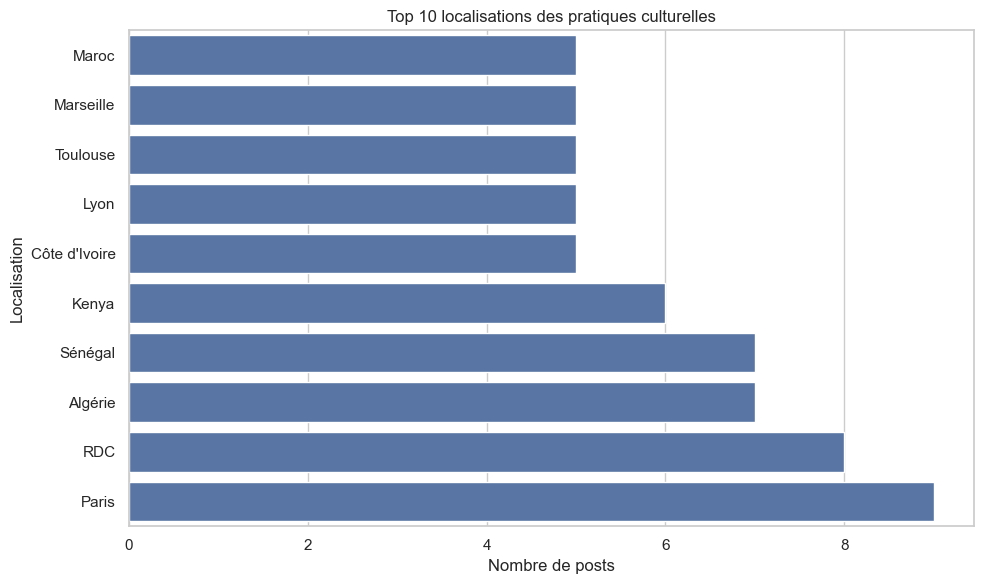

In [6]:
# 5) Top 10 localisations (villes)
assert 'Localisation' in df.columns, "La colonne 'Localisation' est absente du CSV."
loc_counts = df['Localisation'].astype(str).str.strip().value_counts().head(10).sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=loc_counts.values, y=loc_counts.index)
plt.title('Top 10 localisations des pratiques culturelles')
plt.xlabel('Nombre de posts'); plt.ylabel('Localisation')
plt.tight_layout()
plt.savefig(ASSETS_DIR / '5_localisations.png', dpi=150, bbox_inches='tight')
plt.show()
